# Accesing data from the New York Times COVID-19 GitHub repo

In [1]:
%matplotlib inline
import requests
import datetime
import pandas as pd
import matplotlib
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

In [2]:
def download_and_save_raw_data(raw_data_file):
    """
    Download raw data as a CSV file from the NY Times GitHub repo and store it in a 
    disk file.
    """
    df = pd.read_csv(r'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv', 
                 index_col='date')
    df.to_csv(raw_data_file)
    
#download_and_save_raw_data('us-states.csv')

In [3]:
def get_data(raw_data_file, place_name):
    df = pd.read_csv(raw_data_file, index_col='date')
    df = df[df.state==place_name]
    return df

#get_data(raw_data_file, 'Guam')

In [4]:
def plot_data(raw_data_file, place_name):
    """
    Plots data in this notebook and also writes the plot to a PNG file.
    Dataframe is saved in Guam-NYT.csv
    """
    df = get_data(raw_data_file, place_name)
    plot = df.plot(y='cases', style='o', title='Confirmed CORVID-19 cases in {}'.format(place_name))    
    fig = plot.get_figure()
    fig.savefig('images/{}-NYT.png'.format(place_name), bbox_inches='tight')
    
    df.to_csv('{}-NYT.csv'.format(place_name))
    
        
#plot_data('us-states.csv', 'Guam')
#plot_data('ConfirmedUSStates.csv', 'Hawaii')

# MAIN

Refreshing us-states.csv


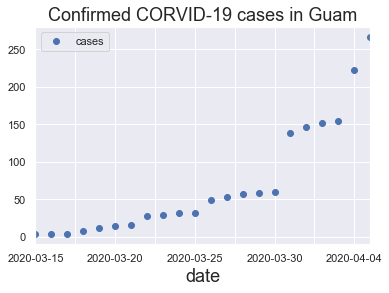

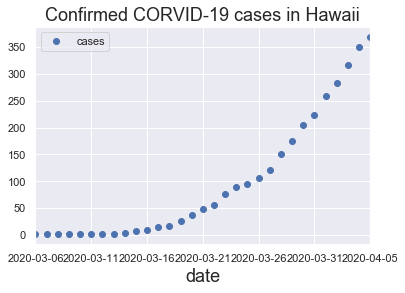

In [5]:
"""
Downloads raw data from NY Times repo and saves in us-states.csv.

Selects data for Guam and Hawaii and saves in Guam-NYT.csv and Hawaii-NYT.csv.
"""

raw_data_file = 'us-states.csv'

#if days_since_file_modified(raw_data_file) > 0.5:
print('Refreshing {}'.format(raw_data_file))
#download_and_save_raw_data(raw_data_file)
    
# Plot data for places of interest in the US
plot_data(raw_data_file, 'Guam')  
plot_data(raw_data_file, 'Hawaii')


In [6]:
df_JH = pd.read_csv('Guam.csv', index_col=0)
df_NYT = pd.read_csv('Guam-NYT.csv', index_col=0)

df_merged = df_JH.merge(right=df_NYT, how='outer', left_index=True, right_index=True)
df_merged['days'] = range(0, df_merged.shape[0])
df_merged.rename(columns={"cases_x": "JHcases", "cases_y": "NYTcases"}, inplace=True)
df_merged

,JHcases,state,fips,NYTcases,deaths,days
2020-03-15,3,Guam,66.0,3.0,0.0,0
2020-03-16,3,Guam,66.0,3.0,0.0,1
2020-03-17,3,Guam,66.0,3.0,0.0,2
2020-03-18,5,Guam,66.0,8.0,0.0,3
2020-03-19,12,Guam,66.0,12.0,0.0,4
2020-03-20,14,Guam,66.0,14.0,0.0,5
2020-03-21,15,Guam,66.0,15.0,0.0,6
2020-03-22,27,Guam,66.0,27.0,1.0,7
2020-03-23,29,Guam,66.0,29.0,1.0,8
2020-03-24,32,Guam,66.0,32.0,1.0,9


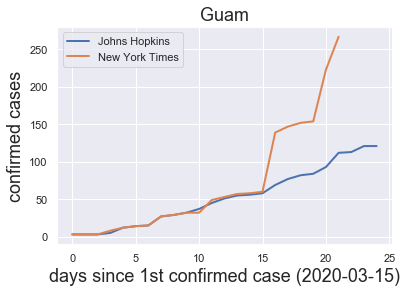

In [7]:
plt.plot(df_merged.days, df_merged.JHcases, df_merged.days, df_merged.NYTcases)
plt.gca().legend(('Johns Hopkins','New York Times'))
plt.xlabel('days since 1st confirmed case (2020-03-15)')
plt.ylabel('confirmed cases')
plt.title('Guam')
plt.savefig('images/JH-NYT-cases.png', bbox_inches='tight')